In [1]:
from itertools import count
from math import cos, gamma, pi, sin, sqrt
from typing import Callable, Iterator, List

def int_sin_m(x: float, m: int) -> float:
    """Computes the integral of sin^m(t) dt from 0 to x recursively"""
    if m == 0:
        return x
    elif m == 1:
        return 1 - cos(x)
    else:
        return (m - 1) / m * int_sin_m(x, m - 2) - cos(x) * sin(x) ** (
            m - 1
        ) / m

def primes() -> Iterator[int]:
    """Returns an infinite generator of prime numbers"""
    yield from (2, 3, 5, 7)
    composites = {}
    ps = primes()
    next(ps)
    p = next(ps)
    assert p == 3
    psq = p * p
    for i in count(9, 2):
        if i in composites:  # composite
            step = composites.pop(i)
        elif i < psq:  # prime
            yield i
            continue
        else:  # composite, = p*p
            assert i == psq
            step = 2 * p
            p = next(ps)
            psq = p * p
        i += step
        while i in composites:
            i += step
        composites[i] = step

def inverse_increasing(
    func: Callable[[float], float],
    target: float,
    lower: float,
    upper: float,
    atol: float = 1e-10,
) -> float:
    """Returns func inverse of target between lower and upper

    inverse is accurate to an absolute tolerance of atol, and
    must be monotonically increasing over the interval lower
    to upper    
    """
    mid = (lower + upper) / 2
    approx = func(mid)
    while abs(approx - target) > atol:
        if approx > target:
            upper = mid
        else:
            lower = mid
        mid = (upper + lower) / 2
        approx = func(mid)
    return mid

def uniform_hypersphere(d: int, n: int) -> List[List[float]]:
    """Generate n points over the d dimensional hypersphere"""
    assert d > 1
    assert n > 0
    points = [[1 for _ in range(d)] for _ in range(n)]
    for i in range(n):
        t = 2 * pi * i / n
        points[i][0] *= sin(t)
        points[i][1] *= cos(t)
    for dim, prime in zip(range(2, d), primes()):
        offset = sqrt(prime)
        mult = gamma(dim / 2 + 0.5) / gamma(dim / 2) / sqrt(pi)

        def dim_func(y):
            return mult * int_sin_m(y, dim - 1)

        for i in range(n):
            deg = inverse_increasing(dim_func, i * offset % 1, 0, pi)
            for j in range(dim):
                points[i][j] *= sin(deg)
            points[i][dim] *= cos(deg)
    return points

In [21]:
points = uniform_hypersphere(4, 1000)

In [26]:
import numpy as np
X = np.array(points)
Y = X[:, 1:] / (1.0 - X[:, 0][:, None])

In [27]:
Y.shape

(1000, 3)

In [28]:
import matplotlib.pyplot as plt
%matplotlib widget

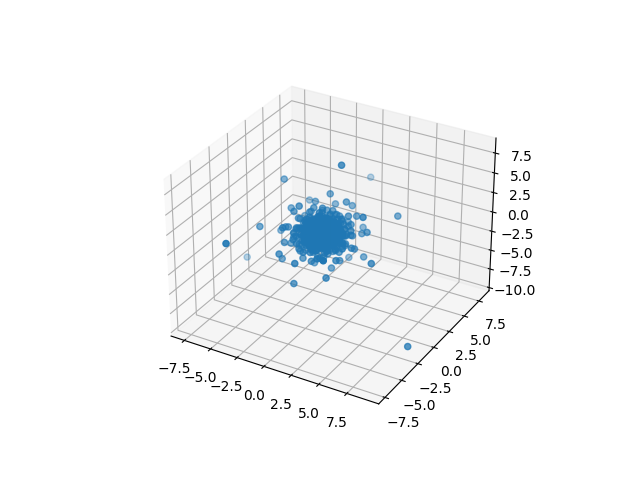

In [29]:
ax = plt.figure().add_subplot(projection="3d")
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2])